# how to find a gift using simple data science techniques

# problem statement

| [![](./img/timo_grumpy.jpg)]()  | [![](./img/melanie_grumpy.jpg)]() | [![](./img/alon_grumpy.jpg)]() |
|:---:|:---:|:---:|
| <span style="font-size:large;">timo sorrow-stricken</span> | <span style="font-size:large;">melanie sorrow-stricken</span> | <span style="font-size:large;">alon sorrow-stricken</span> |

| [![](./img/timo_excited.jpg)]()  | [![](./img/melanie_happy.jpg)]() | [![](./img/alon_excited.jpg)]() |
|:---:|:---:|:---:|
| <span style="font-size:large;">timo happy</span> | <span style="font-size:large;">melanie happy</span> | <span style="font-size:large;">alon happy </span> |

## what can we do?

* be good students!

* spread the data science virus across the organisation

* __let's give them a gift (using simple data science techniques)__

| [![](./img/timo_philosophical.jpg)]()  | [![](./img/chocolate.jpg)]() | [![](./img/marshmallow.jpg)]() | [![](./img/cookies.jpg)]() |
|:---:|:---:|:---:|:---:|
| <span style="font-size:large;">timo undecided</span> | <span style="font-size:large;">chocolate</span> | <span style="font-size:large;">marshmallow</span> | <span style="font-size:large;">cookies</span> |

| [![](./img/melanie_phylosophical.jpg)]()  | [![](./img/red_wine.jpg)]() | [![](./img/white_wine.jpg)]() | [![](./img/rose_wine.jpg)]() |
|:---:|:---:|:---:|:---:|
| <span style="font-size:large;">melanie undecided</span> | <span style="font-size:large;">red wine</span> | <span style="font-size:large;">white wine</span> | <span style="font-size:large;">rose</span> |

| [![](./img/alon_phylosophical.jpg)]()  | [![](./img/JAZZ_MUSIC.jpg)]() | [![](./img/classical_music.jpg)]() | [![](./img/pop_music.jpg)]() |
|:---:|:---:|:---:|:---:|
| <span style="font-size:large;">alon undecided</span> | <span style="font-size:large;">a jazz cd</span> | <span style="font-size:large;">a classic cd</span> | <span style="font-size:large;">a pop cd</span> |

# our solution

# let's train a classification model
[![](./img/model_predict.png)]() 

# small excursion: what's a classification model?
[![](./img/train_model.png)]() 

# small excursion: what's a classification model?
[![](./img/predict_on_training.png)]() 

# small excursion: pitfalls...
[![](./img/overfit.png)]() 


# reduce model complexity...
[![](./img/better_generizability.png)]() 

# but how getting to a gift classification model?

1. __data collection and labeling__

 * pick one gift type per group (i.e. either wine, sweets or music)

 * ideate 4 categorical people attributes that could be related to wine/sweets/music taste (e.g. gender → male|female, preferred_dish → fish|meat|vegetables etc).
 __choose 2-4 categories per attribute, not more__

* prepare an xls sheet based on the questionaire.xls in the folder

 * interview all participants regarding attributes and label

* also ask the facilitators, but don't ask for the label (__remember we want to predict__)

#### it should look something like this in the end
[![](./img/excel_sheet.png)]() 

__2\. data preparation, exploration and visualization__

* split the data into training (the participants) and prediction set (the facilitators)

* understand the data and find out how the individual attributes relate to the label

* visualize findings

__3\. model generation on training data (the participants)__

__4\. the prediction on unlabelled data (the facilitators)__

# let's get our hands dirty

# data collection and labeling

* your task, you have 10 minutes

# data preparation, exploration and visualization

* ok, please fasten your seat belts: codings starts now

In [99]:
# import libraries
import pandas as pd # library for data handling (PANel DAta, common term for multidimensional data)
import seaborn as sns # library for plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/gpfs01/home/ggayq/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [100]:
# read in the data from the prepared excel sheet
data = pd.read_excel('data/wine_taste.xlsx', index_col = 'Name') # modify the filename accordingly

In [101]:
# let's inspect the data
data

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in


do you see something abnormal?

__we now need to split into training data (=all participants) and prediction data (=facilitator)__

In [102]:
data.loc[pd.isnull(data.Label),:]

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Melanie,NaN,spicy,female,extrovert,out


In [103]:
data.loc[~pd.isnull(data.Label),:]

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in


In [104]:
train = data.loc[~pd.isnull(data.Label),:]
test = data.loc[pd.isnull(data.Label),:]

In [105]:
# some very simple summary stats to describe the data 
train.describe()

,Label,Taste,Gender,Personality,eat_in_or_out
count,20,20,20,20,20
unique,3,4,2,2,2
top,white,sweet,male,extrovert,in
freq,9,7,14,11,10


In [106]:
# count of categories
data.Label.value_counts()

white    9
red      7
rose     4
Name: Label, dtype: int64

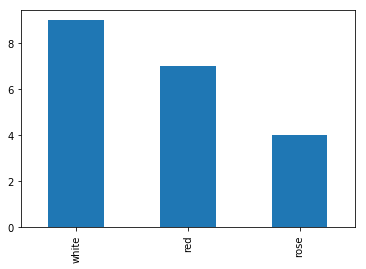

In [107]:
data.Label.value_counts().plot.bar()

Taste


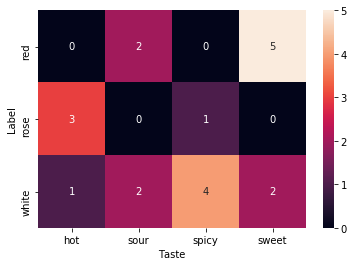

Gender


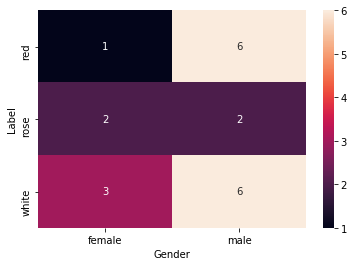

Personality


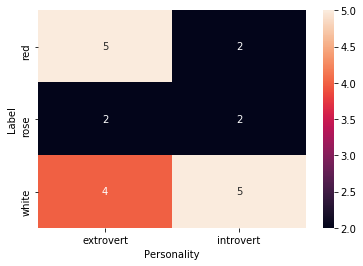

eat_in_or_out


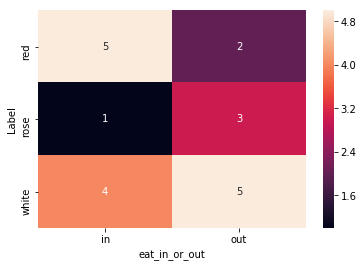

In [109]:
for attribute in train.drop('Label',axis = 1).columns:
    print(attribute)
    sns.heatmap(pd.crosstab(train.Label, train[attribute]), annot = True)
    show()

# model generation on training data (the participants)

# decision tree
[![](./img/decision_tree.png)]() 

# random forest
[![](./img/random_forrest.png)]() 

In [110]:
# import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [112]:
# generate one-hot encoding
train_one_hot = pd.get_dummies(train.drop('Label', axis = 1))
test_one_hot = pd.get_dummies(test.drop('Label', axis = 1))
test_one_hot = test_one_hot.loc[:,train_one_hot.columns].fillna(0).astype('int') # sorry that's a little dirty (but data science reality)

In [113]:
train_one_hot

,Taste_hot,Taste_sour,Taste_spicy,Taste_sweet,Gender_female,Gender_male,Personality_extrovert,Personality_introvert,eat_in_or_out_in,eat_in_or_out_out
Name,,,,,,,,,,
Peter,0,0,0,1,0,1,0,1,1,0
Andreas,0,0,1,0,0,1,1,0,1,0
James,0,0,0,1,0,1,1,0,1,0
Jim,0,0,1,0,0,1,0,1,0,1
John,0,0,1,0,0,1,1,0,0,1
Daniel,1,0,0,0,0,1,1,0,1,0
Catherine,1,0,0,0,1,0,1,0,0,1
Paula,1,0,0,0,1,0,0,1,0,1
Adrian,0,0,0,1,0,1,1,0,1,0


In [111]:
# instantiate the model
clf = RandomForestClassifier()

In [117]:
# fit the model to the training data
clf.fit(train_one_hot,train.Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [115]:
pred_labels = clf.predict(test_one_hot)

[![](./img/drumroll.png)]() 

In [116]:
print('the model predicts: {} loves {} wine'.format(test.index[0],pred_labels[0]))

the model predicts: Melanie loves white wine


# reflection

* stages of a data science project

* feature engineering influences model outcome

* data exploration to check validity of data

* good programmers don't reinvent the wheel